<a href="https://colab.research.google.com/github/mirandaqiqi1219/Titantic-ML-from-Disaster/blob/master/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
#upload the train.csv
train_df = pd.read_csv("/content/train.csv")

In [0]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
is_survived_filter = train_df["Survived"] == 1
non_survived_filter = train_df["Survived"] == 0
survived = train_df[is_survived_filter]
non_survived = train_df[non_survived_filter]
survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [0]:
non_survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


## Data Dictionary

*Passenger ID：*is not useful variable for prediction of survival

*Survived:*	 Survival	 (0 = Not survived, 1 = Survived)

*Pclass:*	 Ticket class	(1 = 1st class, 2 = 2nd class, 3 = 3rd class)

*Name:* Paasenger Name

*Sex: *passenger gender (male / female)

*Age:*	Age in years	

*SibSp:*	# of siblings / spouses aboard the Titanic	

*Parch*	# of parents / children aboard the Titanic

*Ticket:*	Ticket number	

*Fare:*	Passenger fare	

*Cabin:*	Cabin number

*Embarked:*	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
#numerical data 
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
#categorical data
train_df.describe(include=['O']) 

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Moor, Mrs. (Beila)",male,347082,B96 B98,S
freq,1,577,7,4,644


In [0]:
#drop the variable name, because it not relevant to the prediction of survival
#figure out relevant between survived and each variable (including numerical and caregorical)
#firstly, discovery the relationship between discrete variables and survived. Including Pclass, Sex, Sibsp, Parch, and Embark.
#relationship between pclass and survived
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# there are some correlation between the pclass and survived, so keep the variable pclass

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [0]:
#relationship between sex and survived
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# there are some correlation between the sex and survived, so keep this variable into final model.

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [0]:
#relationship between sibsp and survived
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#do not have any clear correlation, hence drop the Sibsp variable

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [0]:
#relationship between parch and survived
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#do not have any clear correlation, hence drop the Parch variable 

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [0]:
#relationship between embarked and survived
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# there are some correlation between the embarked and survived, so keep the embarked variable

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [0]:
# Secondly, print out the relationship between the continuous variable and survived. Including Age and Fare.
# utilize table (survived and non-survived)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


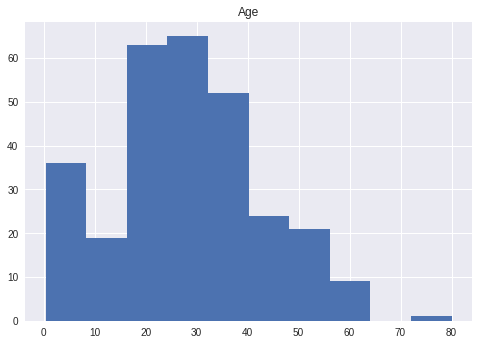

In [0]:
#the relationship between the age and survived
#survived passenger age
age_survived_df = survived.ix[:,['Age', 'Survived']]
age_survived_df
hist_survive_age = age_survived_df.hist(column = "Age")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


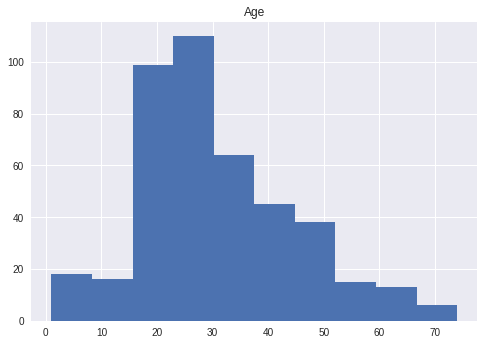

In [0]:
#non-survived passenger age
age_non_survived_df = non_survived.ix[:,['Age', 'Survived']]
age_non_survived_df
hist_non_survived_age = age_non_survived_df.hist(column = "Age")
#According to compare two histogram of age, we can figure out large part of child (0 to 10) and old people (older than 75) are survived. Hence, the age variable is relevant to the survived.

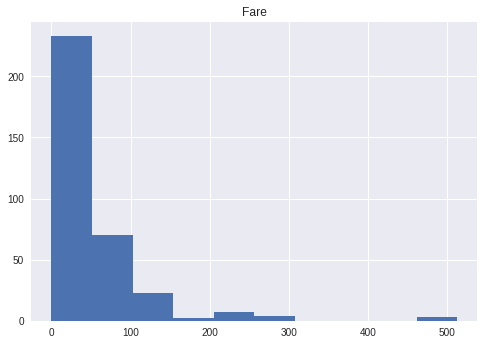

In [0]:
#relationship between fare and survived
#survived passenger fare
fare_survived_df = survived.ix[:,['Fare', 'Survived']]
fare_survived_df
hist_survive_fare = fare_survived_df.hist(column = "Fare")

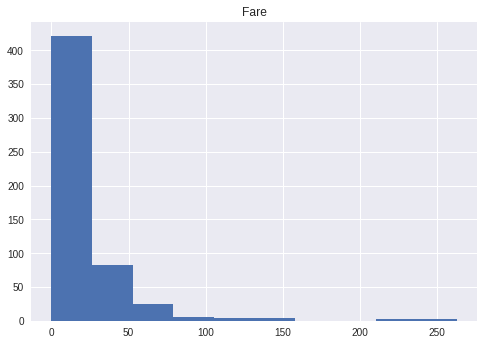

In [0]:
#non survived passenger fare
fare_non_survived_df = non_survived.ix[:,['Fare', 'Survived']]
fare_non_survived_df
hist_non_survive_fare = fare_non_survived_df.hist(column = "Fare")
#According to compare two histogram of fare, we can figure out passengers who's fare is larger than 250 are almost survived. Hence, the fare variable is relevant to the survived

In [0]:
# according to the analysis about variables seperately, I chose to keep the following variables in the final model: Pclass, Sex, Age, Fare and Embarked

In [0]:
#dealing with the missing value， utilizing mean of each column to impute the missing value

fill_train_df = train_df.fillna(train_df.mean())

In [0]:
fill_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
#preparation of the data frame

fill_train_df['Sex'] = fill_train_df['Sex'].map({'female': 1, 'male': 0}).astype(int)

fill_train_df['Embarked'] = fill_train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    
  


In [0]:
data_train_df = fill_train_df.drop(columns = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'])


In [0]:
X_train = data_train_df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
Y_train = data_train_df['Survived']

In [0]:
X_train = X_train.fillna(X_train.mean())

In [0]:
data_train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,22.0,7.2500,0.0
1,1,1,1,38.0,71.2833,1.0
2,1,3,1,26.0,7.9250,0.0
3,1,1,1,35.0,53.1000,0.0
4,0,3,0,35.0,8.0500,0.0


In [0]:
test_df = pd.read_csv("/content/test.csv")

In [0]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:

test_df['Sex'] = test_df['Sex'].map({'female': 1, 'male': 0}).astype(int)
test_df['Embarked'] = test_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [0]:
data_test_df = test_df.drop(columns = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'])

In [0]:
final_test_df = data_test_df.fillna(train_df.mean())

In [0]:
combine = [data_train_df, final_test_df]

In [0]:
X_test = final_test_df


In [0]:
X_train.shape, Y_train.shape, X_test.shape

((891, 5), (891,), (418, 5))

In [0]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,0,22.0,7.2500,0.0
1,1,1,38.0,71.2833,1.0
2,3,1,26.0,7.9250,0.0
3,1,1,35.0,53.1000,0.0
4,3,0,35.0,8.0500,0.0


In [0]:
#modeling comparing
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

In [0]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [0]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [0]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [0]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier


In [0]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [0]:
models = pd.DataFrame({
    'Model': ['Stochastic Gradient Decent', 
              'Random Forest',
              'Decision Tree'],
    'Score': [acc_sgd, acc_random_forest,
              acc_decision_tree]})
print(models.sort_values(by='Score', ascending=False))

                        Model  Score
1               Random Forest  97.98
2               Decision Tree  97.98
0  Stochastic Gradient Decent  71.38


In [0]:
#because random forest with the highest score, choose the random forest
rf = RandomForestClassifier(n_estimators=250, max_depth=5, criterion='gini')
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)

In [0]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })

In [0]:
submission.to_csv("submission.csv")
